In [1]:
import numpy as np
from IPython.display import display, Math

from lib.pde_find import PDEFind
from lib.utils.plot_1D import plot_2d, plot_3d

<Figure size 640x480 with 0 Axes>

In [2]:
data = np.load("data/2.npz")

u = data["u"]
x = data["x"]
t = data["t"]

In [3]:
pdefind = PDEFind(
    var_labels=(["x", "t"], ["u"]),
    polynomial_degree=2,
    order=3,
)

In [4]:
grid = pdefind.add_grid(x, t)

In [5]:
library, labels = pdefind.create_library(u)

display(Math(r"\\".join(labels)))

<IPython.core.display.Math object>

In [6]:
u_t = np.gradient(u, t[0], axis=1)

In [7]:
coeffs, alpha = pdefind.solve_regression(library, u_t, algorithm="tlsq", num_term_limit=range(1, 5), verbose=True)

Solving using tlsq regression
Library size: (15, 512, 201), Target size: 102912
Trying max_terms=1


TLSQ Iterations:  54%|█████▍    | 27/50 [00:00<00:00, 207.72it/s, #nzz_terms=1, cutoff=0.01]


Error: 0.0003307903067465865
Trying max_terms=2


TLSQ Iterations:  38%|███▊      | 19/50 [00:00<00:00, 194.87it/s, #nzz_terms=2, cutoff=0.01]


Error: 1.222265676079629e-06
Trying max_terms=3


TLSQ Iterations:  26%|██▌       | 13/50 [00:00<00:00, 164.06it/s, #nzz_terms=3, cutoff=0.01]


Error: 1.0166151180559092e-06
Trying max_terms=4


TLSQ Iterations:  22%|██▏       | 11/50 [00:00<00:00, 141.13it/s, #nzz_terms=4, cutoff=0.01]


Error: 1.0162541637240107e-06
Minimum error at 4 terms
# of non-zero terms: 4


We get the absolute lowest error for a solution with 4 terms. We prefer sparsity over the lowest error so we choose the solution with 2 terms since the error is still very low.

In [8]:
coeffs, alpha = pdefind.solve_regression(library, u_t, algorithm="tlsq", num_term_limit=2, verbose=True)

Solving using tlsq regression
Library size: (15, 512, 201), Target size: 102912
Trying max_terms=2


TLSQ Iterations:  38%|███▊      | 19/50 [00:00<00:00, 201.90it/s, #nzz_terms=2, cutoff=0.01]


Error: 1.222265676079629e-06
Minimum error at 2 terms
# of non-zero terms: 2


In [9]:
display(Math(pdefind.latex_string(coeffs, labels, "u")))

<IPython.core.display.Math object>

In [10]:
initial_condition = [u[:, 0]]
coefficients = [coeffs]

u_pred = pdefind.solve(initial_condition, coefficients, labels)

0
The solver successfully reached the end of the integration interval.


In [11]:
l2_err_u = np.linalg.norm(u - u_pred) / np.linalg.norm(u)

print(f"L2 error for u: {l2_err_u:.3e}")

l2_err_u = np.linalg.norm(u[..., -1] - u_pred[..., -1]) / np.linalg.norm(u[..., -1])

print(f"L2 error (final_t) for u: {l2_err_u:.3e}")

L2 error for u: 6.023e-02
L2 error (final_t) for u: 1.750e-01


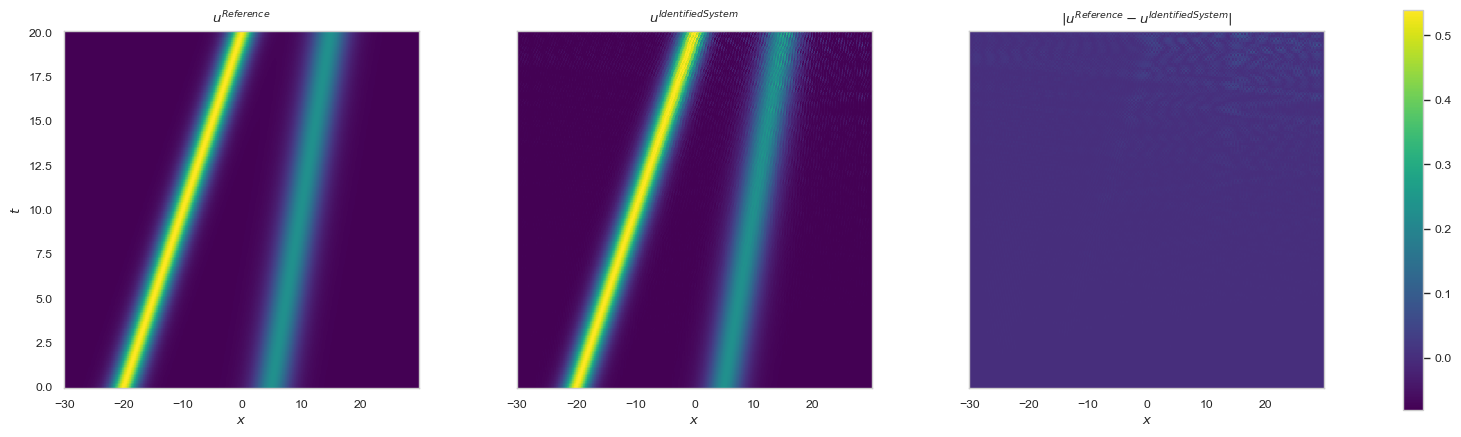

In [12]:
ref_sol = np.stack([x, t, u], axis=-1)
sol_plot = sol_plot = np.expand_dims(u_pred, axis=2)

plot_2d(sol_plot, ref_sol, "figures/pde2_2d.png", ratio=6/2)

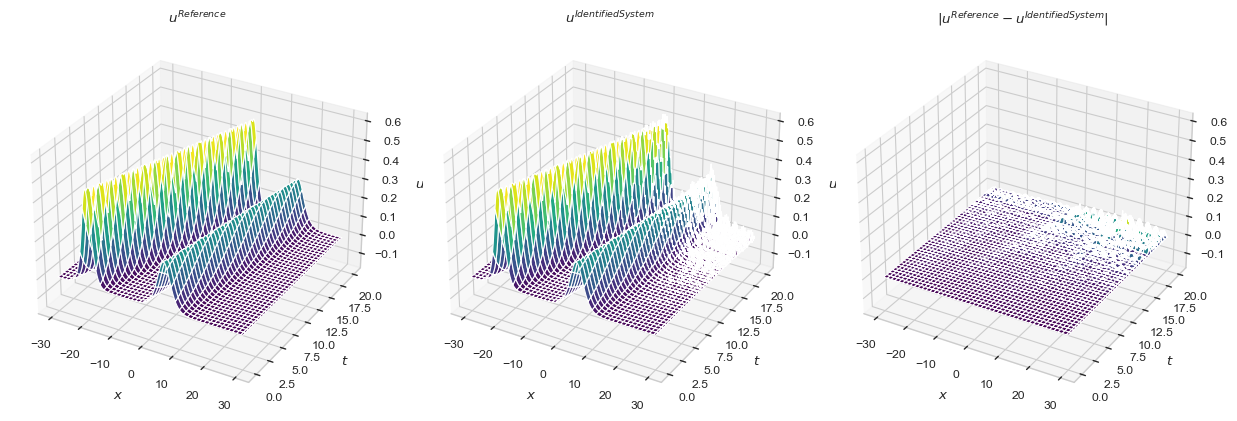

In [13]:
plot_3d(sol_plot, ref_sol, "figures/pde2_3d.png")